In [1]:
from beir.datasets.data_loader import GenericDataLoader
from beir.retrieval.search.dense import FlatIPFaissSearch
from model_biencoder import LongBiEncoder, BiEncoder

import os
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import dotenv
dotenv.load_dotenv()
STORAGE_DIR = os.getenv("STORAGE_DIR")


/Tmp/lvpoellhuber/bmir-env/lib/python3.12/site-packages/beir/datasets/data_loader.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
def plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, title):
    query_corpus = []
    for qid in qrels:
        docid = list(qrels[qid].keys())[0]
        query_corpus.append(corpus[docid])

    corpus_embeddings = biencoder.encode_corpus(query_corpus, batch_size=batch_size)
    query_embeddings = biencoder.encode_queries(list(queries.values()), batch_size=batch_size)

    corpus_pca = PCA(n_components=2)
    projected_corpus_embeds = corpus_pca.fit_transform(corpus_embeddings)

    query_pca = PCA(n_components=2)
    projected_query_embeds = query_pca.fit_transform(query_embeddings)
    
    plt.plot(projected_corpus_embeds[:, 0], projected_corpus_embeds[:, 1], 'ro', markersize=2, label="corpus")
    plt.plot(projected_query_embeds[:, 0], projected_query_embeds[:, 1], 'bo', markersize=2, label="queries")
    plt.title(title)
    plt.legend()
    plt.show()

    return corpus_embeddings, query_embeddings, projected_corpus_embeds, projected_query_embeds


# DPR MS Marco

In [3]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/longtriever/ms_biencoder"
batch_size = 3
task = "msmarco-doc-short"

biencoder = BiEncoder.from_pretrained(biencoder_path)
    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")


100%|██████████| 256146/256146 [00:03<00:00, 76558.08it/s]


100%|██████████| 26/26 [00:00<00:00, 165.83it/s]


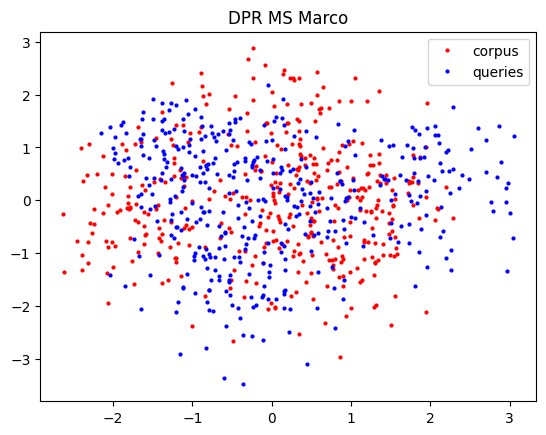

In [4]:
corpus_embeddings, query_embeddings, projected_corpus_embeds, projected_query_embeds = plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "DPR MS Marco")

# DPR NQ

In [5]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/new-attention/dpr/test2"
batch_size = 3
task = "nq/nq-short"

biencoder = BiEncoder.from_pretrained(biencoder_path)
    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")


100%|██████████| 319146/319146 [00:00<00:00, 358892.09it/s]


100%|██████████| 32/32 [00:00<00:00, 178.22it/s]


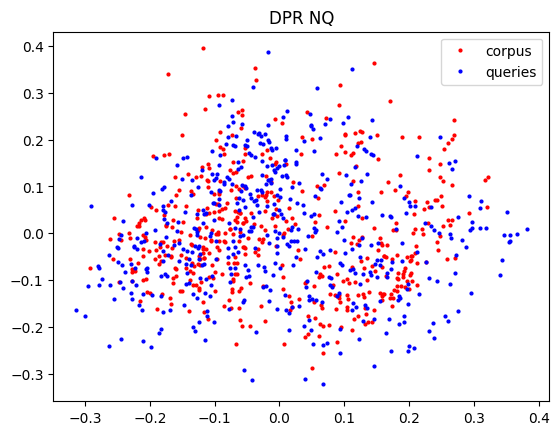

In [6]:
corpus_embeddings, query_embeddings, projected_corpus_embeds, projected_query_embeds = plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "DPR NQ")

# Hierarchical

In [7]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/hierarchical/hierarchical"
batch_size = 3
task = "msmarco-doc-short"

biencoder = LongBiEncoder.from_pretrained(biencoder_path)
    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")


100%|██████████| 256146/256146 [00:03<00:00, 67474.04it/s]


100%|██████████| 26/26 [00:00<00:00, 73.19it/s]


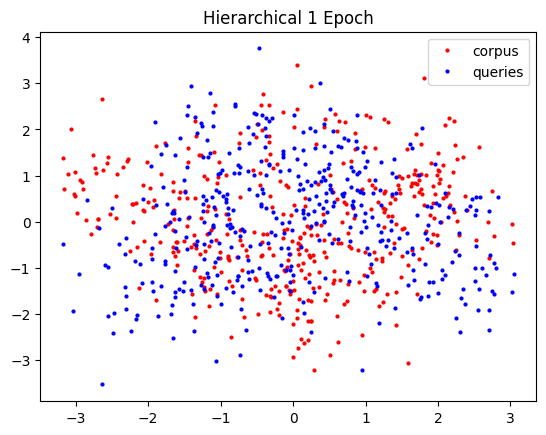

In [8]:
corpus_embeddings, query_embeddings, projected_corpus_embeds, projected_query_embeds = plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "Hierarchical 1 Epoch")

# Fresh Longtriever

In [9]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/hierarchical/hierarchical"
batch_size = 3
task = "msmarco-doc-short"
model_path = "/Tmp/lvpoellhuber/models/longtriever/pretrained/bert-base-uncased"

biencoder = LongBiEncoder(
    model_path=(model_path, model_path) ,
    normalize=False,
    prompts={"query": "", "passage": ""},
    attn_implementation="eager", 
    sep = " [SEP] ", 
    batch_size=batch_size,
    max_block_length=512, 
    max_num_blocks=8,
    model_type = "longtriever"
)    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")



100%|██████████| 256146/256146 [00:03<00:00, 76725.19it/s]


100%|██████████| 139/139 [00:01<00:00, 82.87it/s]


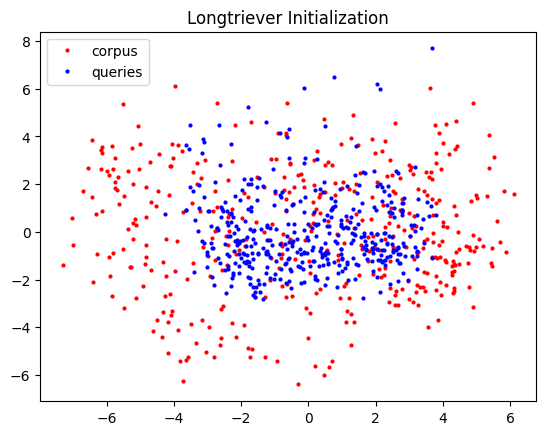

In [10]:
corpus_embeddings, query_embeddings, projected_corpus_embeds, projected_query_embeds = plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "Longtriever Initialization")

# Longtriever 8 epochs


In [11]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/longtriever/longtriever_8epochs"
batch_size = 3
task = "msmarco-doc-short"

biencoder = LongBiEncoder.from_pretrained(biencoder_path)
    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")


100%|██████████| 256146/256146 [00:03<00:00, 67715.07it/s]


100%|██████████| 26/26 [00:00<00:00, 82.32it/s]


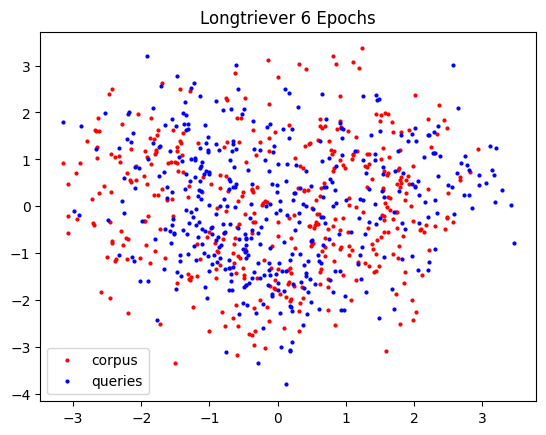

In [12]:
corpus_embeddings, query_embeddings, projected_corpus_embeds, projected_query_embeds = plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "Longtriever 6 Epochs")

# Longtriever 1 Epoch

In [17]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/longtriever/longtriever_unclamped"
batch_size = 3
task = "msmarco-doc-short"

biencoder = LongBiEncoder.from_pretrained(biencoder_path)
    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")


100%|██████████| 256146/256146 [00:03<00:00, 66467.68it/s]


100%|██████████| 26/26 [00:00<00:00, 83.65it/s]


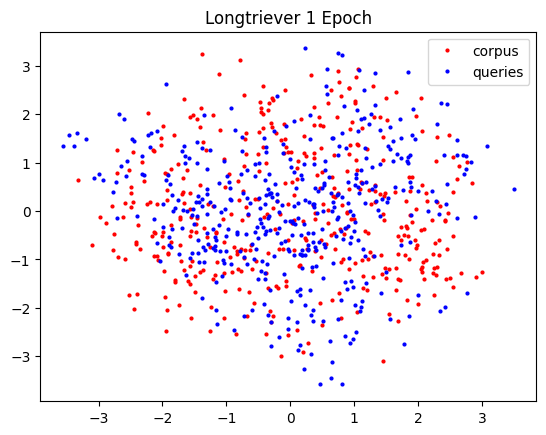

: 

In [ ]:
corpus_embeddings, query_embeddings, projected_corpus_embeds, projected_query_embeds = plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "Longtriever 1 Epoch")